In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import metrics

def lin(x, a, b):
    return a*x + b

height_file = open('thin_wall.pickle', 'rb')
height_data = pickle.loads(height_file.read())

print(len(height_data[0]))


1048


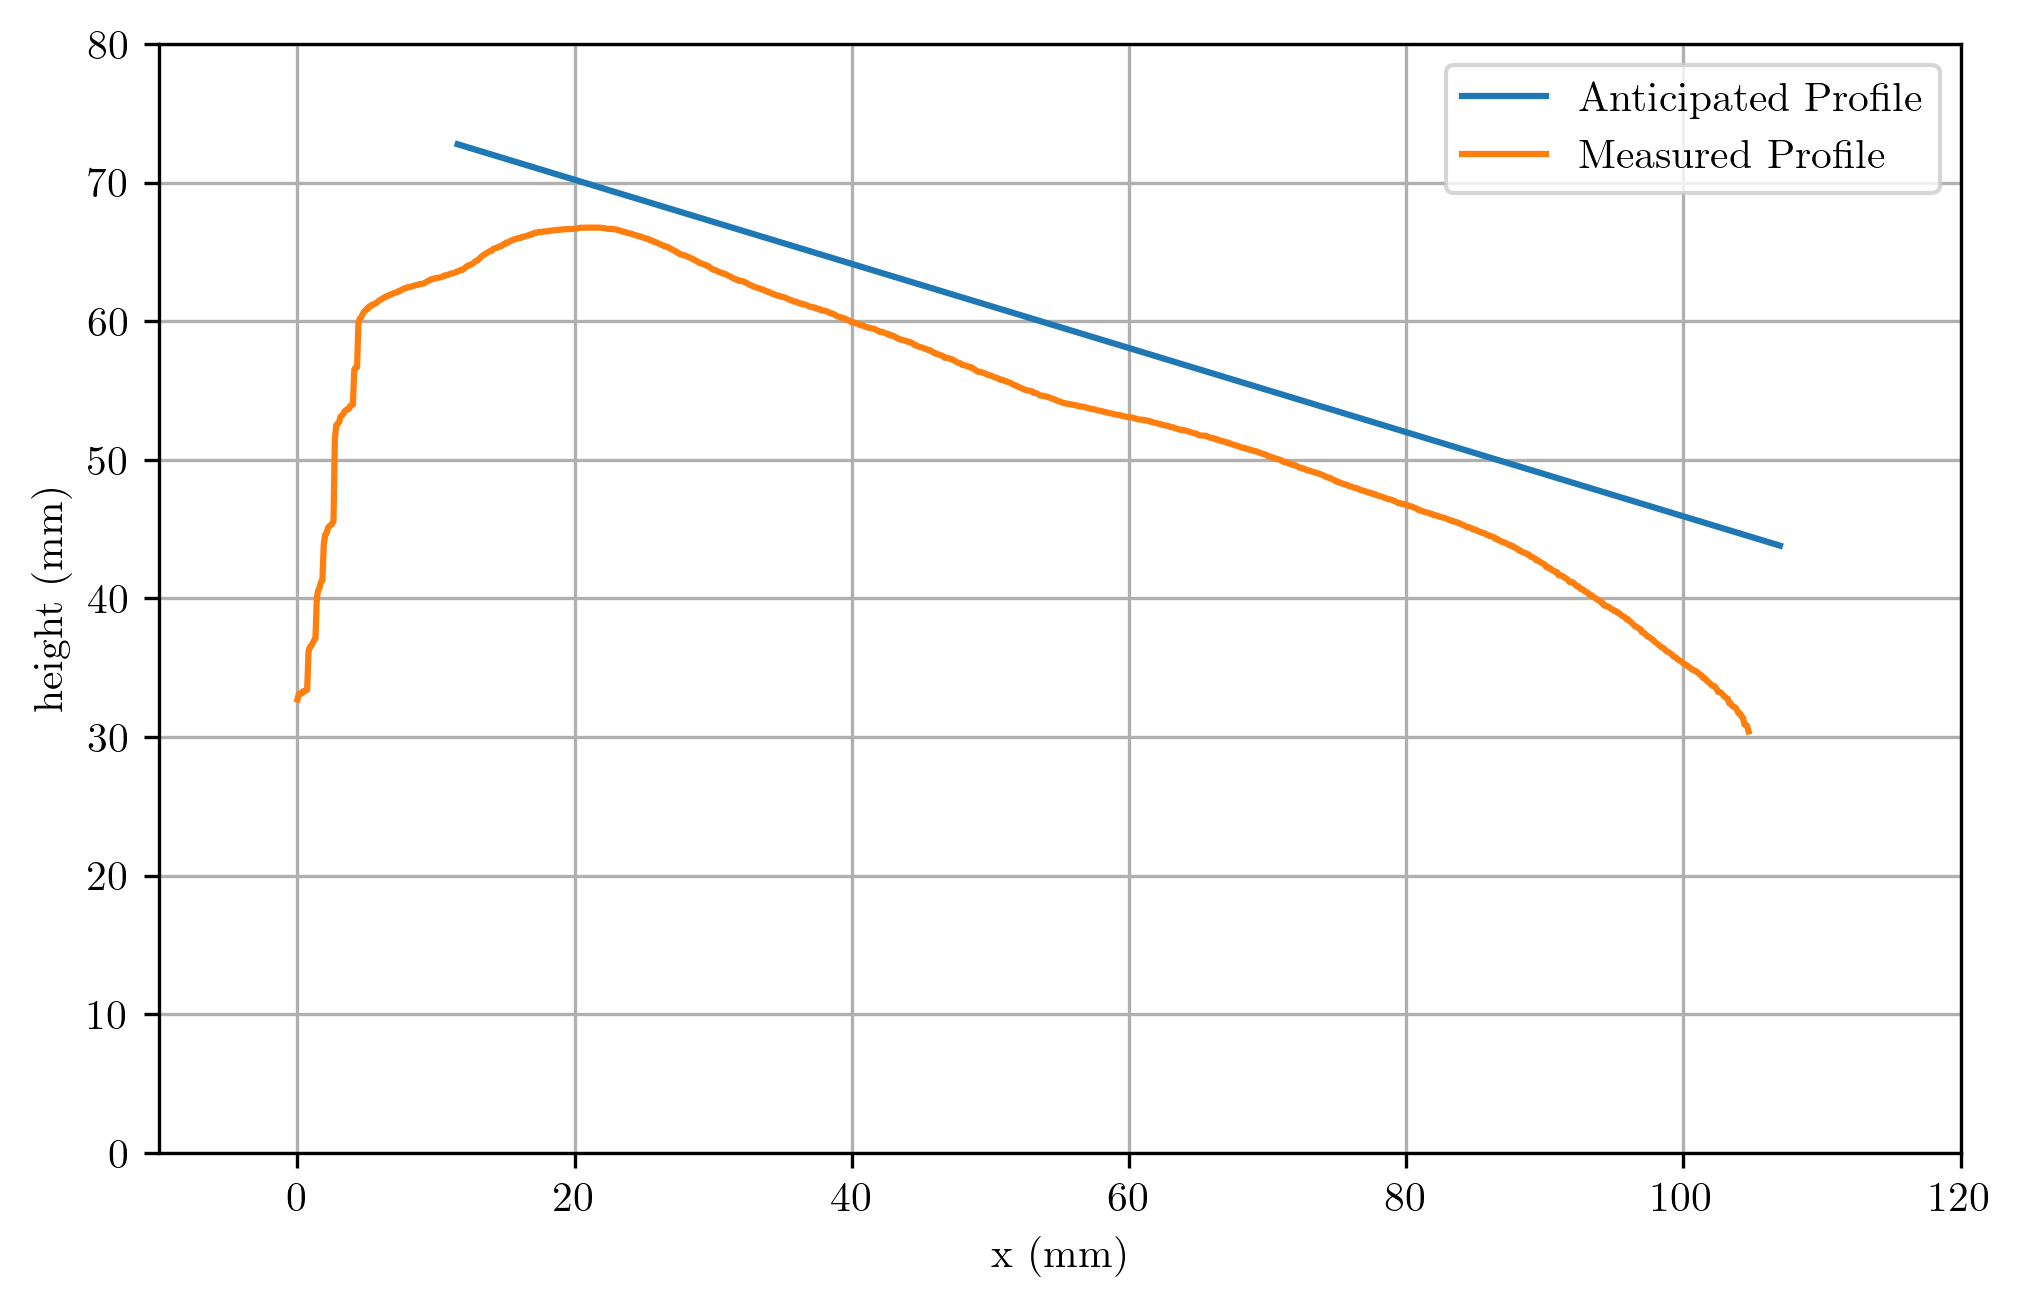

In [2]:
heights = np.array(height_data[0])

offset= 0
x_vals = np.linspace(11.562,106.96)

v_offset = 3
angle = 16.88614994820722
dist = 251.2627106882681

heights[:,1] = heights[:,1]-v_offset
b_val = np.tan(np.radians(angle))*dist
slope = b_val/-dist
x_offset = [x+offset for x in x_vals]
line = lin(x_vals, slope, b_val)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax = plt.subplots(1,1)
fig.dpi=300
ax.plot(x_offset,line)
ax.plot(heights[:,0], heights[:,1])
ax.legend(["Anticipated Profile", "Measured Profile"])
ax.set_aspect('equal')
ax.set_ylim(0,80)
ax.set_xlim(-10,120)
ax.set_xlabel("x (mm)")
ax.set_ylabel("height (mm)")
# ax.plot([30.642, 30.642],[0,80])
# ax.plot([87.81,87.81], [0,80])
fig.set_figwidth(10)
ax.grid()
plt.show()

In [3]:
upper_lim = 878
lower_lim = 306
print(heights[upper_lim])
print(heights[lower_lim])
print(type(heights))

[87.8        43.68058832]
[30.6        63.50282549]
<class 'numpy.ndarray'>


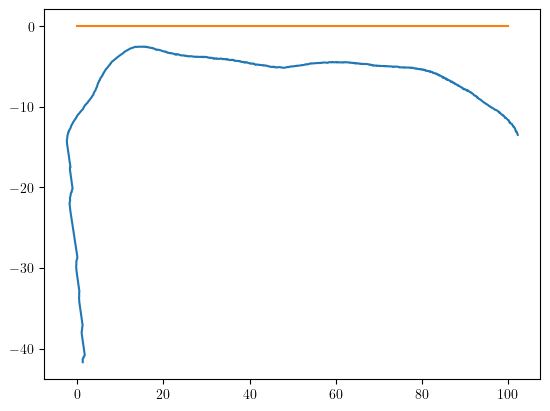

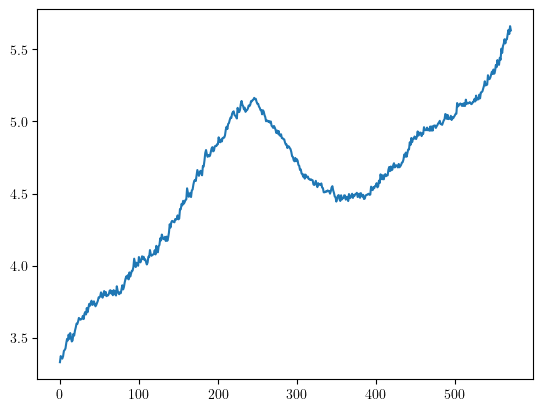

4.619760824437997


In [4]:
# rotate to flat
angle_mod = angle
height_mod = heights #heights[lower_lim:upper_lim]

for i in range(len(height_mod)):
    x_o = height_mod[i,0]
    y_o = height_mod[i,1]

    height_mod[i,0] = dist+(x_o-dist)*np.cos(np.radians(angle_mod))-(y_o*np.sin(np.radians(angle_mod)))

    height_mod[i,1] = (x_o-dist)*np.sin(np.radians(angle_mod))+y_o*np.cos(np.radians(angle_mod))

fig,ax = plt.subplots()
ax.plot(height_mod[:,0], height_mod[:,1])
ax.plot([0,100],[0, 0])

plt.show()

error=0-height_mod[lower_lim:upper_lim,1]
plt.plot(error)
plt.show()
rms = np.sqrt(np.sum(error**2)/len(error))
print(rms)

-4.591270434232467
RMS from average:  0.5122751943583267
Maximum Error:  1.0696004638033223
Number of Datapoints:  572


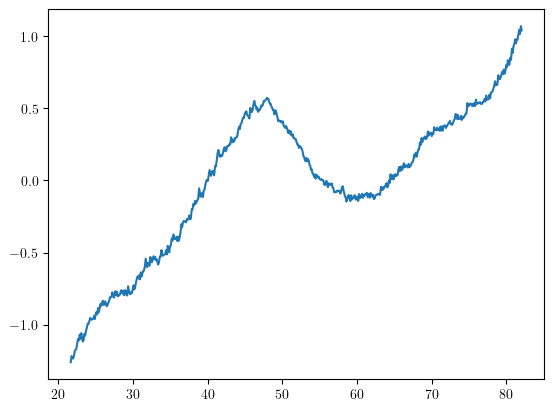

In [6]:
average_top_surface = np.average(height_mod[lower_lim:upper_lim,1])
print(average_top_surface)

error=average_top_surface-height_mod[lower_lim:upper_lim,1]
rms = np.sqrt(np.sum(error**2)/len(error))
print("RMS from average: ",rms)
print("Maximum Error: ", max(error))

print("Number of Datapoints: ", len(error))

plt.plot(height_mod[lower_lim:upper_lim,0],error)
plt.show()

65.77987661449181


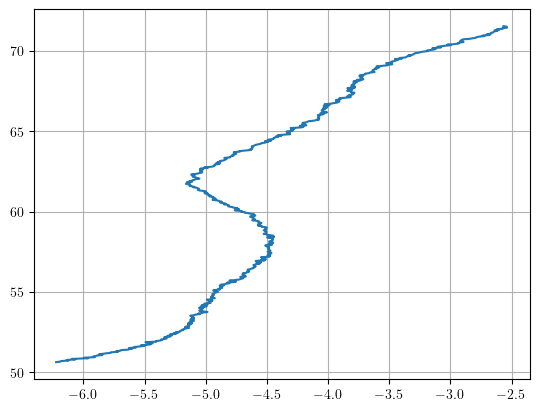

: 

In [ ]:
start_idx = 250
end_idx = 900
predic_height = lin(heights[start_idx:end_idx, 0], slope, b_val)

error=predic_height-heights[start_idx:end_idx,1]
rms = np.sqrt(np.sum(error**2)/len(error))
print(rms)

fig,ax = plt.subplots()
ax.plot(heights[start_idx:end_idx,1],predic_height)
ax.grid()
plt.show()